##**Classification Task**

Dataset Used: {diabetes}

We classify patients as positive or negative tested using given features in model training

In [20]:
# Importing important Libraries
import numpy as np
import pandas as pd
from scipy.io import arff
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix,classification_report,multilabel_confusion_matrix
from sklearn.utils import shuffle
from sklearn import preprocessing, metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset and storing as dataframe
data = arff.loadarff(r'/content/diabetes.arff')
df = pd.DataFrame(data[0])
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


In [3]:
# Data Preprocessing
print("Rows and columns:", df.shape) # We have 768 records and 9 features in the dataset
print('\nColumns Names:', df.columns) # Columns Names
print("\nCheck missing records:")
print(df.isna().sum()) # number of missing values in each column is zero in the dataset

Rows and columns: (768, 9)

Columns Names: Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

Check missing records:
preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [4]:
# We have a single categorical features and 8 numerical feature
print("Categorical Feature:")
print(df.select_dtypes(['object']).columns)
print('\nNumerical Feature:')
print(df.select_dtypes(['float64']).columns)

Categorical Feature:
Index(['class'], dtype='object')

Numerical Feature:
Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')


In [5]:
#now generate a label encoding scheme for mapping class category to a numeric value
encoder = LabelEncoder()
class_labels = encoder.fit_transform(df['class'])
mapping = {index: label for index, label in enumerate(encoder.classes_)}
print(mapping)   

{0: b'tested_negative', 1: b'tested_positive'}


In [6]:
# loading the transformed labels into our data frame as a new column.
df['class_labels'] = class_labels
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class,class_labels
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive',1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative',0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive',1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative',0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive',1


In [7]:
# Now our data is all clean and we can pass it to Machine Learning Algorithm
# We will first specify the features and target in the dataset
# our inputs/features are ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
# our output/target variable is 'class_labels'
inputs =  ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
X = df[inputs]
y = df.drop(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], axis=1)

X = np.array(X)
y = np.array(y)
X = preprocessing.scale(X) # standardize data into std=1 and mean=0
print("Total tested_negative records:", np.sum(y==0))
print("Total tested_positive records:", np.sum(y==1))
# 0: 'tested_negative', 1: 'tested_positive

Total tested_negative records: 500
Total tested_positive records: 268


In [8]:
# get train, test splits// train size=70% and test size=30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537, 1) (231, 1)


In [9]:
#classifier = SVC()
classifier = SVC(C=1, kernel="sigmoid", gamma=0.1, probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [12]:
def check_performance(y_true,y_pred):
  accuracy = round(accuracy_score(y_true, y_pred) * 100, 2)
  print("Accuracy  : {}%".format(accuracy))
  print()
  cm=confusion_matrix(y_true, y_pred)
  print("Confusion_matrix")
  print(cm)
  print()
  tn = cm[0][0]
  fn = cm[1][0]
  tp = cm[1][1]
  fp = cm[0][1]
  print("True Negative  : {}".format(tn))
  print("Flase Positive  : {}".format(fp))
  print("False Negative  : {}".format(fn))
  print("True Positive  : {}".format(tp))
  print()

In [13]:
print("Classification Performance of Support Vector Classifier:\n")
check_performance(y_test,y_pred)

Classification Performance of Support Vector Classifier:

Accuracy  : 75.76%

Confusion_matrix
[[124  15]
 [ 41  51]]

True Negative  : 124
Flase Positive  : 15
False Negative  : 41
True Positive  : 51



##**Regression Task**

Dataset Used: {cpu.with.vendor}

We find the performance prediction using given features.

In [14]:
# Reading the dataset and storing as dataframe
data = arff.loadarff(r'/content/cpu.with.vendor.arff')
df = pd.DataFrame(data[0])
df.head()

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,b'adviser',125.0,256.0,6000.0,256.0,16.0,128.0,199.0
1,b'amdahl',29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
2,b'amdahl',29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
3,b'amdahl',29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
4,b'amdahl',29.0,8000.0,16000.0,32.0,8.0,16.0,132.0


In [15]:
print("Rows and columns:", df.shape) # We have 209 records and 8 columns in the dataset
print('\nColumns Names:', df.columns) # Columns Names
print("\nCheck missing records:")
print(df.isna().sum()) # number of missing values in each column is zero in the dataset

Rows and columns: (209, 8)

Columns Names: Index(['vendor', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'class'], dtype='object')

Check missing records:
vendor    0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
class     0
dtype: int64


In [16]:
# We have a single categorical features and 7 numerical feature
print("Categorical Feature:")
print(df.select_dtypes(['object']).columns)
print('\nNumerical Feature:')
print(df.select_dtypes(['float64']).columns)

Categorical Feature:
Index(['vendor'], dtype='object')

Numerical Feature:
Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'class'], dtype='object')


In [17]:
# In this model we are not interested in the vendor information so we delete the vendor columns
del df['vendor']
# rename the class column as performance
df = df.rename(columns={'class' : 'performance'})
df.head(2)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,performance
0,125.0,256.0,6000.0,256.0,16.0,128.0,199.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0


In [21]:
# our inputs/features are ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
# our output/target variable is 'performance'
inputs =  ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
X = df[inputs]
y = df.drop(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'], axis=1)
X = np.array(X)
y = np.array(y)
X, y = shuffle(X,y) #shuffle the records in the dataset
X = preprocessing.scale(X) # standardize data into std=1 and mean=0

# get train, test splits// train size=80% and test size=20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(177, 6) (32, 6) (177, 1) (32, 1)


In [23]:
# Decissiontree Regression model Training
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
# Model Prediction
y_pred = regressor.predict(X_test) # prediction
# Performance Evaluation
print('Model Performance')
Accuracy = round(metrics.r2_score(y_test,y_pred) * 100, 2)
print('r2 score: {}%'.format(Accuracy))

Model Performance
r2 score: 78.22%


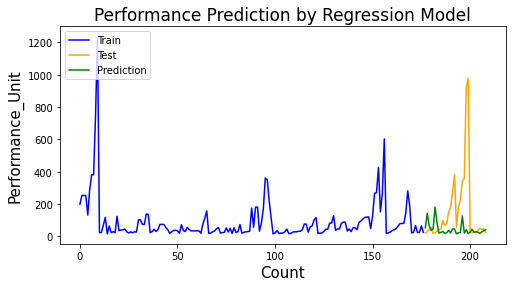

In [25]:
# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
train = df[:177]
test = df[177:]
test['Prediction'] = y_pred
plt.plot(train['performance'], c='blue', label='Train')
plt.plot(test['performance'], c='orange',label='Test')
plt.plot(test['Prediction'], c='green', label='Prediction')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Performance_Unit',fontsize=15)
plt.title('Performance Prediction by Regression Model',fontsize=17)
plt.legend(loc=2)

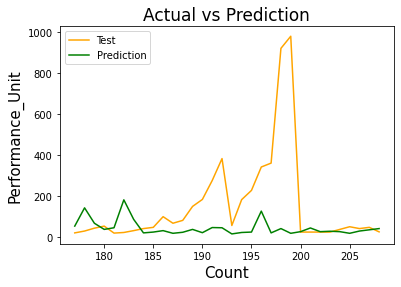

In [26]:
# Actual vs Prediction
plt.plot(test['performance'], c='orange',label='Test')
plt.plot(test['Prediction'], c='green', label='Prediction')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Performance_Unit',fontsize=15)
plt.title('Actual vs Prediction',fontsize=17)
plt.legend(loc=2)

##**Clustering Task**

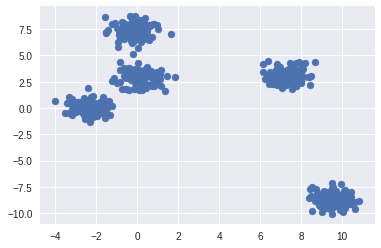

In [33]:
# Clustering
# It falls under unsupervised learning in which we have features X = f1,f2.. but we have no traget available upon which we learn a mapping
# here we group the data in several groups based on certain similarities
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, centers=5, cluster_std=0.6) #centers are classes for groupings based on certain similarities
plt.scatter(X[:,0], X[:,1]) #all samples of feature0 and all samples of feature1

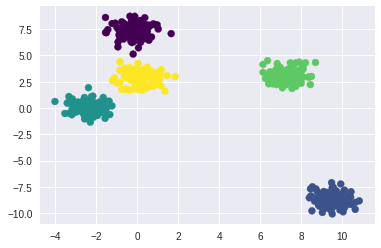

In [34]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X)
y_pred = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
# So the same group get the same color and the similaries in this case is the distance between two points